Train shape: (60000, 28, 28) Test shape: (10000, 28, 28)


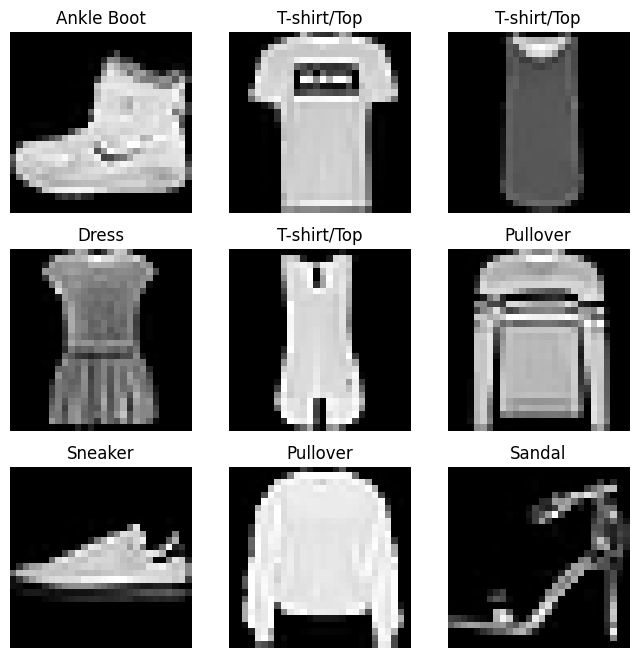

In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load Fashion-MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize pixel values (0–255 → 0–1)
x_train, x_test = x_train / 255.0, x_test / 255.0

print("Train shape:", x_train.shape, "Test shape:", x_test.shape)

# Show some sample images
class_names = ["T-shirt/Top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i], cmap="gray")
    plt.title(class_names[y_train[i]])
    plt.axis("off")
plt.show()

In [7]:
# Simple dense model
model = models.Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7838 - loss: 0.6216 - val_accuracy: 0.8375 - val_loss: 0.4390
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8638 - loss: 0.3802 - val_accuracy: 0.8617 - val_loss: 0.3888
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8773 - loss: 0.3360 - val_accuracy: 0.8658 - val_loss: 0.3723
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8852 - loss: 0.3113 - val_accuracy: 0.8749 - val_loss: 0.3525
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8934 - loss: 0.2880 - val_accuracy: 0.8733 - val_loss: 0.3535
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8987 - loss: 0.2744 - val_accuracy: 0.8762 - val_loss: 0.3405
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9003 - loss: 0.2663 - val_accuracy: 0.8725 - val_loss: 0.3696
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9023 - loss: 0.2614 

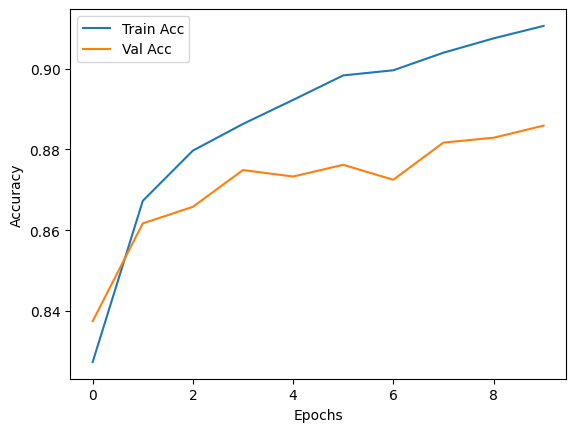

In [8]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [9]:
reg_model = models.Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    layers.Dropout(0.4),
    layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

reg_model.compile(optimizer="adam",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])

reg_history = reg_model.fit(x_train, y_train, epochs=15,
                            validation_data=(x_test, y_test))

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7146 - loss: 1.1332 - val_accuracy: 0.8314 - val_loss: 0.6368
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.8151 - loss: 0.6748 - val_accuracy: 0.8380 - val_loss: 0.5878
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.8219 - loss: 0.6286 - val_accuracy: 0.7992 - val_loss: 0.6399
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.8215 - loss: 0.6199 - val_accuracy: 0.8451 - val_loss: 0.5550
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.8250 - loss: 0.6074 - val_accuracy: 0.8429 - val_loss: 0.5523
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8258 - loss: 0.6044 - val_accuracy: 0.8316 - val_loss: 0.5752
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.8269 - loss: 0.5991 - val_accuracy: 0.8443 - val_loss: 0.5466
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8309 - loss: 0

In [10]:
cnn_model = models.Sequential([
    layers.Reshape((28,28,1), input_shape=(28,28)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dropout(0.4),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn_model.compile(optimizer="adam",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])

cnn_history = cnn_model.fit(x_train, y_train, epochs=10,
                            validation_data=(x_test, y_test))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 66s 34ms/step - accuracy: 0.7597 - loss: 0.6615 - val_accuracy: 0.8715 - val_loss: 0.3605
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 32ms/step - accuracy: 0.8718 - loss: 0.3505 - val_accuracy: 0.8842 - val_loss: 0.3250
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 33ms/step - accuracy: 0.8876 - loss: 0.3013 - val_accuracy: 0.8938 - val_loss: 0.2917
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 33ms/step - accuracy: 0.8974 - loss: 0.2738 - val_accuracy: 0.9024 - val_loss: 0.2752
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 32ms/step - accuracy: 0.9043 - loss: 0.2527 - val_accuracy: 0.9078 - val_loss: 0.2563
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 32ms/step - accuracy: 0.9115 - loss: 0.2327 - val_accuracy: 0.9118 - val_loss: 0.2516
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 33ms/step - accuracy: 0.9184 - loss: 0.2155 - val_accuracy: 0.9075 - val_loss: 0.2511
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 32ms/step - accuracy: 0.9216 -

In [11]:
test_loss, test_acc = cnn_model.evaluate(x_test, y_test, verbose=2)
print("\nTest accuracy:", test_acc)

313/313 - 3s - 9ms/step - accuracy: 0.9137 - loss: 0.2438

Test accuracy: 0.9136999845504761


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


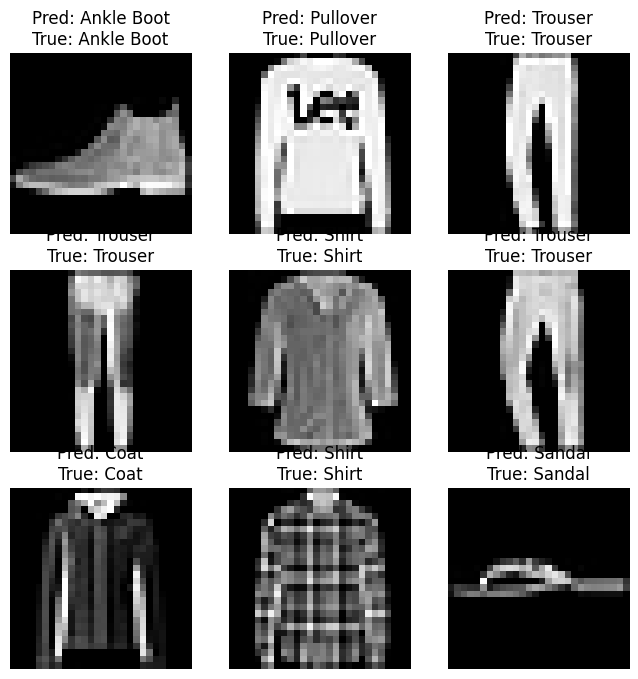

In [12]:
import numpy as np

predictions = cnn_model.predict(x_test)

plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[i], cmap="gray")
    pred_label = class_names[np.argmax(predictions[i])]
    true_label = class_names[y_test[i]]
    plt.title(f"Pred: {pred_label}\nTrue: {true_label}")
    plt.axis("off")
plt.show()